In [1]:
!sudo apt update
!sudo apt-get update
!sudo apt autoremove

# first run this cell to install fonts
!sudo apt install msttcorefonts
exit(0) # restart runtime

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:11 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources [1,770 kB]
Ign:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:13 https://developer.download

In [1]:
# check the fonts you prefer in the font list
import  matplotlib.font_manager
flist = matplotlib.font_manager.get_fontconfig_fonts()
names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
names

['Liberation Sans',
 'Liberation Mono',
 'Verdana',
 'Courier New',
 'Arial',
 'Comic Sans MS',
 'Trebuchet MS',
 'Verdana',
 'Georgia',
 'Courier New',
 'Verdana',
 'Comic Sans MS',
 'Liberation Sans Narrow',
 'Liberation Sans Narrow',
 'Arial',
 'Andale Mono',
 'Courier New',
 'Liberation Sans',
 'Verdana',
 'Times New Roman',
 'Andale Mono',
 'Arial Black',
 'Courier New',
 'Trebuchet MS',
 'Arial',
 'Georgia',
 'Liberation Mono',
 'Courier New',
 'Liberation Serif',
 'Georgia',
 'Arial',
 'Liberation Sans',
 'Trebuchet MS',
 'Arial',
 'Trebuchet MS',
 'Courier New',
 'Liberation Serif',
 'Trebuchet MS',
 'Liberation Sans',
 'Arial Black',
 'Times New Roman',
 'Trebuchet MS',
 'Liberation Sans Narrow',
 'Times New Roman',
 'Liberation Serif',
 'Arial',
 'Comic Sans MS',
 'Courier New',
 'Liberation Sans Narrow',
 'Times New Roman',
 'Impact',
 'Humor Sans',
 'Liberation Mono',
 'Courier New',
 'Georgia',
 'Georgia',
 'Georgia',
 'Verdana',
 'Verdana',
 'Liberation Serif',
 'Trebuche

In [1]:
!ls ~/.cache

matplotlib  node-gyp


In [4]:
!rm ~/.cache/matplotlib -rf

In [2]:
import math
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid", font_scale=1.4)
sns.set_style({'font.family': 'Times New Roman'})

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def clustermap(X, label, label_fontsize, label_padding, ticks_fontsize, filename, palette_string, factor=2):

    import seaborn as sns
    sns.set(style="whitegrid", font_scale=1.4*factor)
    sns.set_style({'font.family': 'Times New Roman'})

    lut = dict(zip(label.unique(), "grb"))
    row_colors = label.map(lut)
    df_colors = pd.DataFrame(data={'Disease': row_colors[row_colors == 'r'], 'Control': row_colors[row_colors == 'g']}) 

    custom_cmap = sns.color_palette(palette_string, 21, as_cmap=True)
    g = sns.clustermap(X, cmap=custom_cmap, row_colors=df_colors, z_score=1, figsize=(10*factor, 10*factor))
    g.fig.subplots_adjust(right=0.9)
    g.ax_cbar.set_position((0.7, .2, .03, .4), 'horizontal')

    g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize=ticks_fontsize*factor)
    g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize=ticks_fontsize*factor, rotation=0)
    g.ax_heatmap.set_xlabel('Metabolites', fontsize=label_fontsize*factor, labelpad=label_padding*factor)
    g.ax_heatmap.set_ylabel('Patient', fontsize=label_fontsize*factor, labelpad=label_padding*factor)

    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.show()

def feature_importance_plot(X, y, label_fontsize, label_padding, ticks_fontsize, filename, palette_string, factor=4):
    model = RandomForestClassifier(n_estimators=17, random_state=0)
    model.fit(X, y)

    plt.figure(figsize=(8*factor, 8*factor))

    bar_chart_data = pd.Series(data=model.feature_importances_).sort_values(ascending=False).to_frame()
    bar_chart_data.columns = ['Feature Importance']
    bar_chart_data['Metabolites'] = pd.Series(data=model.feature_importances_, index=X.columns).sort_values(ascending=False).index

    color_palette = sns.color_palette(palette_string, X.shape[1]+3)
    color_palette.reverse()

    b_plot = sns.barplot(x="Feature Importance", y="Metabolites", data=bar_chart_data, palette=color_palette)
    b_plot.set_xlabel("Feature Importance", fontsize=label_fontsize*factor, labelpad=label_padding*factor)
    b_plot.set_ylabel("Metabolites", fontsize=label_fontsize*factor, labelpad=label_padding*factor)
    b_plot.tick_params(labelsize=ticks_fontsize*factor)

    sns.despine(left=True, bottom=True)
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.show()

### `Approach 1`

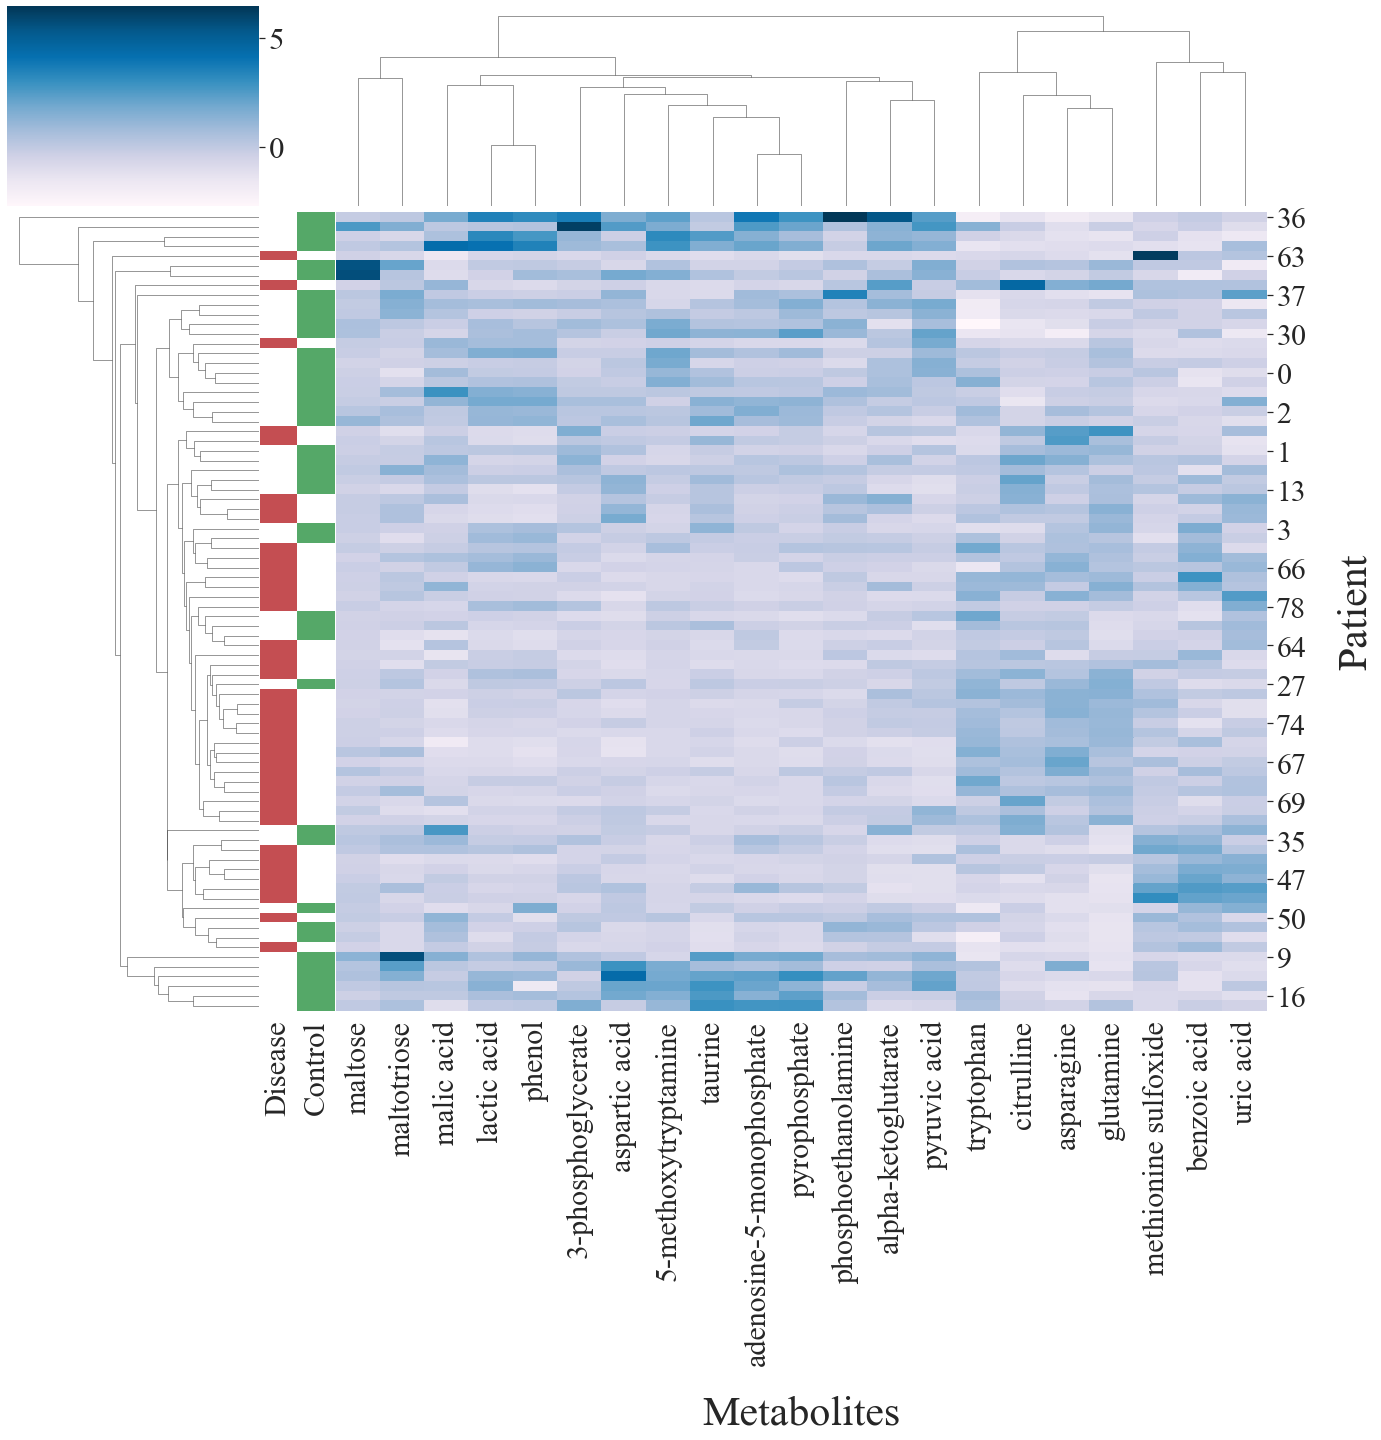

In [ ]:
plasma = pd.read_csv('plasma(Specific Metabolics)_final.csv').drop('Unnamed: 0', axis=1)

X = plasma.iloc[:, :-1]
label = plasma["Class"]
y = label.map({"control": 1, "disease": 0})

clustermap(X, label, 21, 15, 15, 'cm_plasma_a1.jpg', 'PuBu')

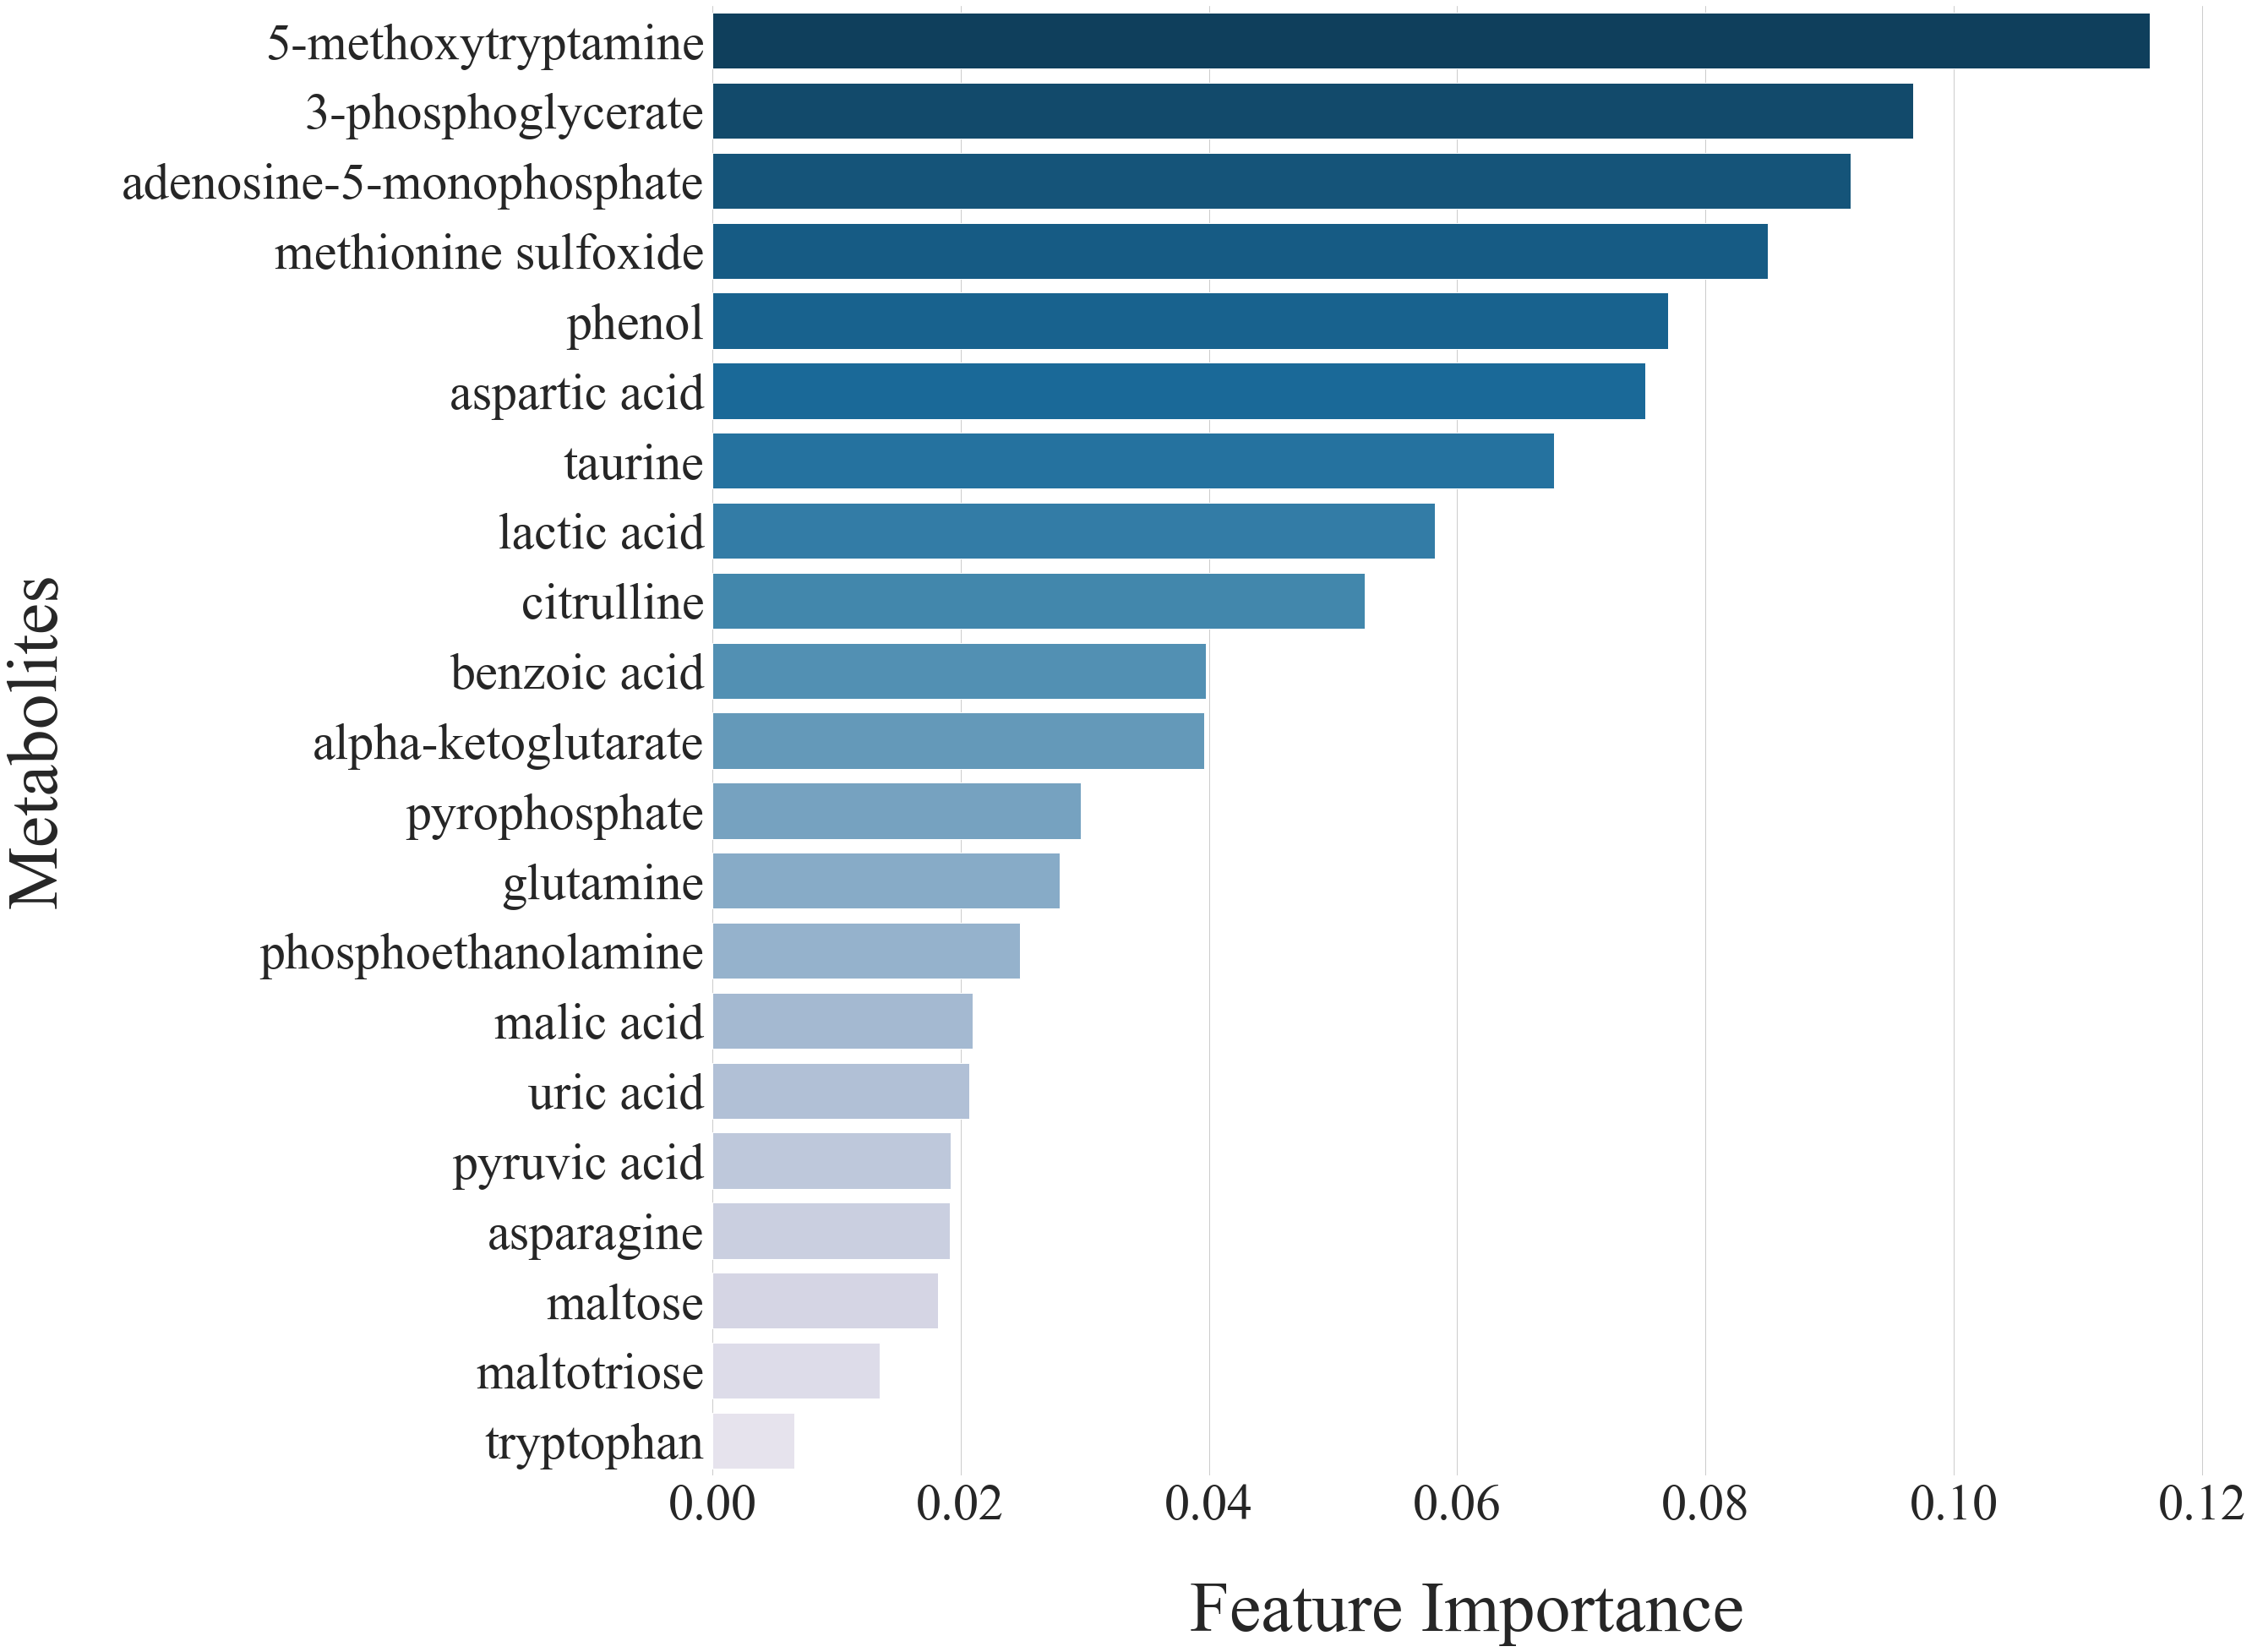

In [ ]:
feature_importance_plot(X, y, 21, 15, 15, 'fip_plasma_a1.jpg', 'PuBu')

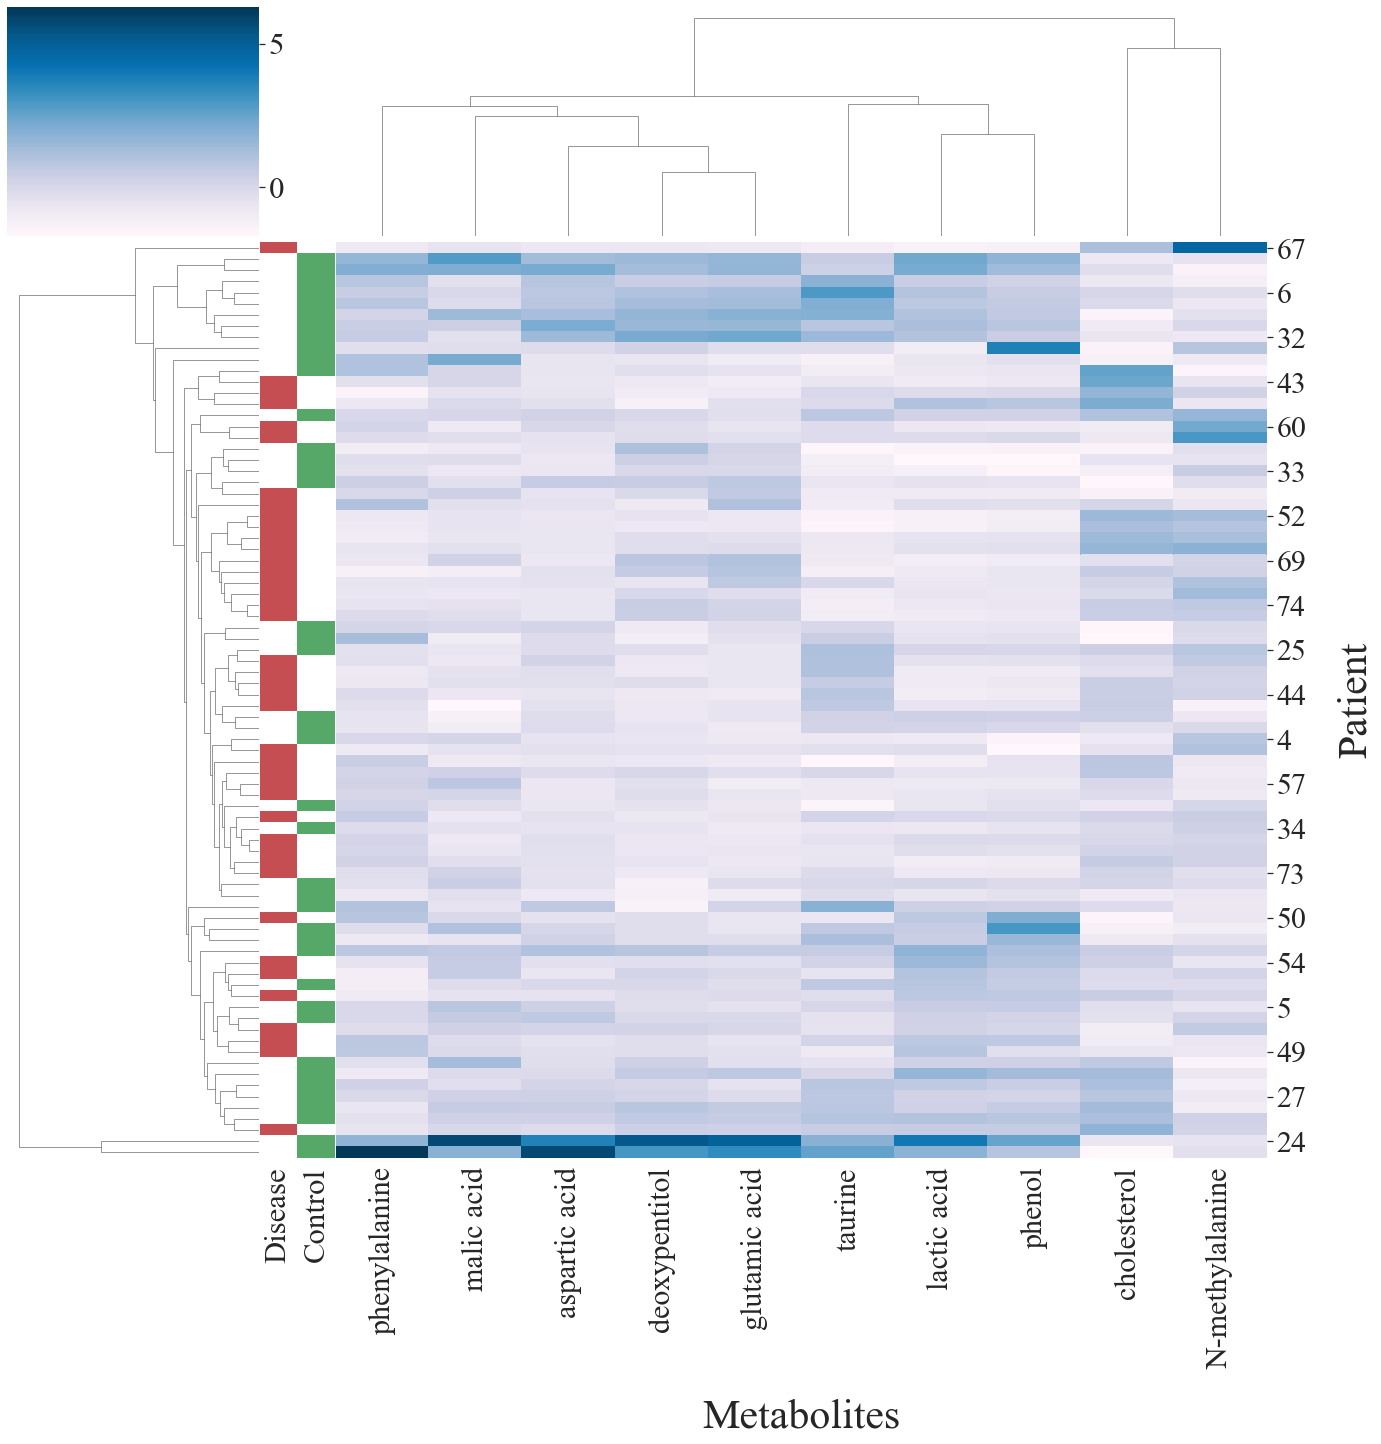

In [ ]:
serum = pd.read_csv('serum(Specific Metabolics)_final.csv').drop('Unnamed: 0', axis=1)
X = serum.iloc[:, :-1]

clustermap(X, label, 21, 15, 15, 'cm_serum_a1.jpg', 'PuBu')

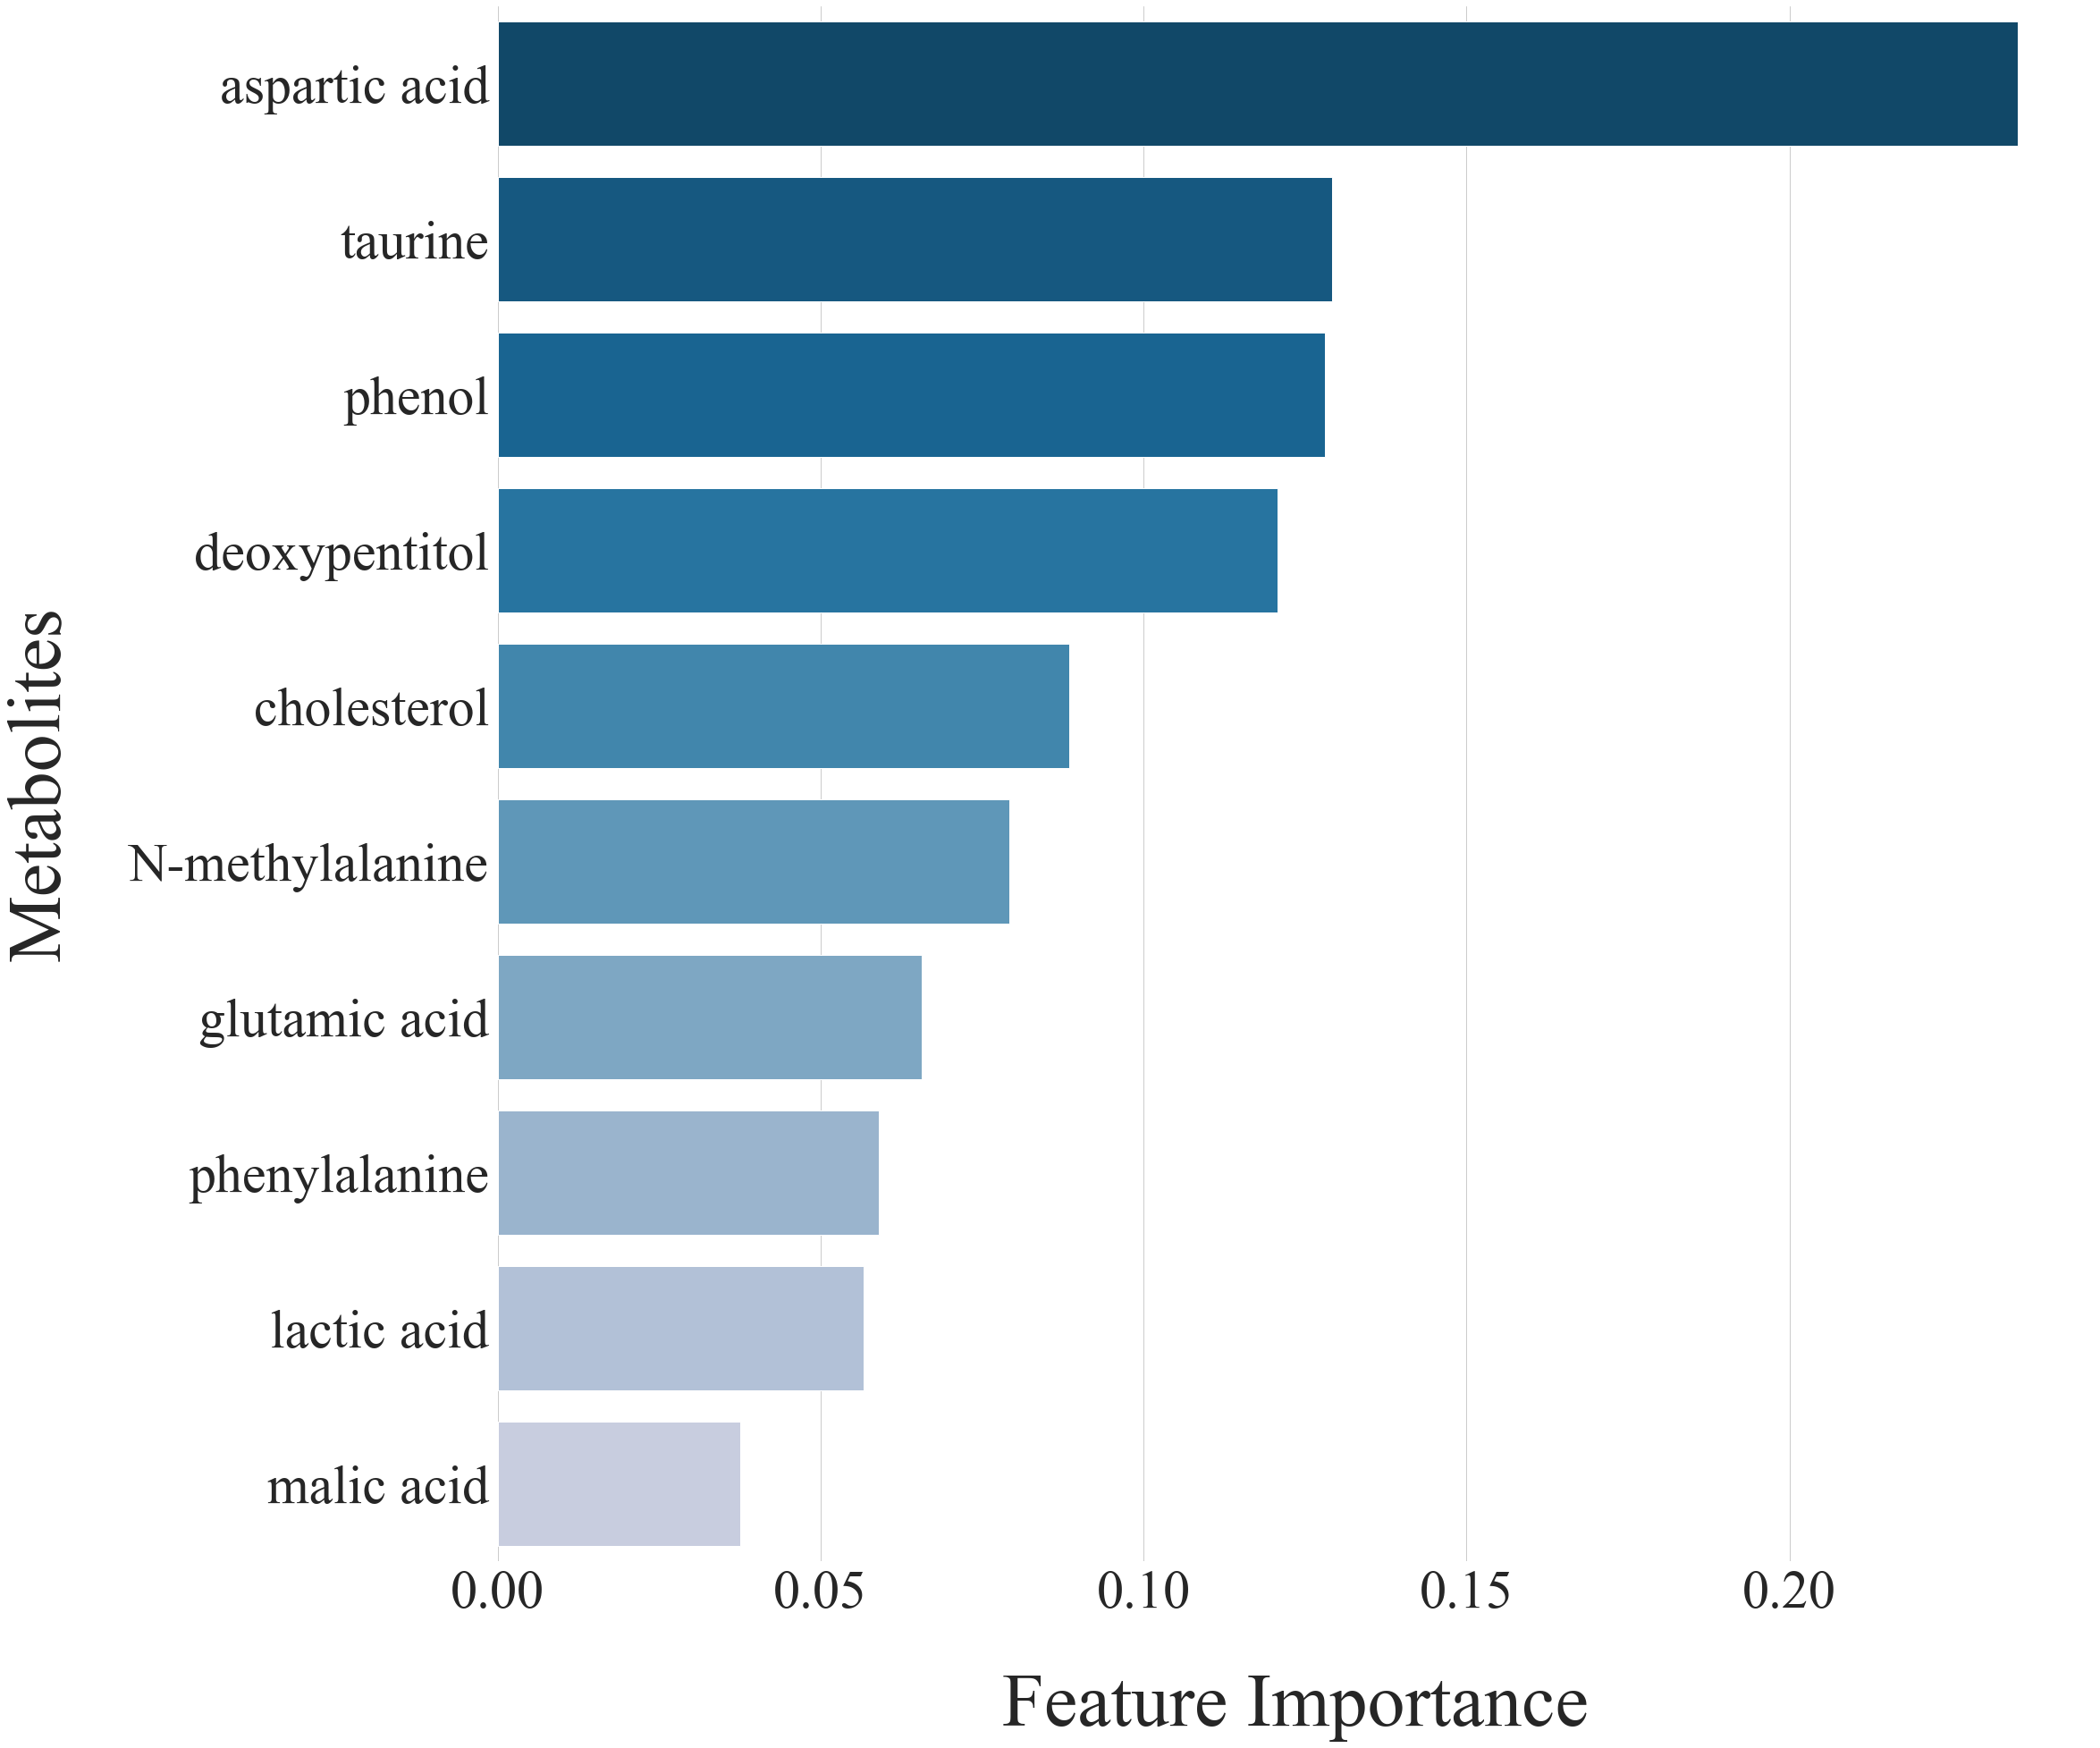

In [ ]:
feature_importance_plot(X, y, 21, 15, 15, 'fip_serum_a1.jpg', 'PuBu')

### `Approach 2`

In [ ]:
plasma = pd.read_csv('plasma_processed.csv')
serum = pd.read_csv('serum_processed.csv')
plasma.rename(columns = {"​​tocopherol alpha-": 'alpha-tocopherol', "tocopherol gamma-": "gamma-tocopherol"}, inplace=True)
serum.rename(columns = {"tocopherol alpha-": 'alpha-tocopherol', 'tocopherol gamma-': 'gamma-tocopherol'}, inplace = True)

plasma0 = plasma.drop(['Unnamed: 0'], axis=1)
serum0 = serum.drop(['Unnamed: 0'], axis=1)

for i in ['plasma', 'serum']:
    scl = StandardScaler().fit(vars()[i+'0'].iloc[:, :-1])
    stand = scl.transform(vars()[i+'0'].iloc[:, :-1])
    vars()[i] = pd.DataFrame(stand, columns = vars()[i+'0'].columns[:-1])
    vars()[i] = pd.concat([vars()[i], vars()[i+'0'].iloc[:, -1]], axis=1)

pearson_p = []
for i in plasma.columns:
    if plasma[i].dtypes!='O':
        pearson_coef, p_value = stats.pearsonr(plasma[i], plasma['Class'].map({"control": 0, "disease": 1}))
        pearson_p.append([i, pearson_coef, p_value])
pearson_p_df = pd.DataFrame(pearson_p, columns=['Features', 'Pearson Coefficient', 'p-Value'])

pearson_p_final_plasma = []
for i in range(158):
    if pearson_p_df.loc[i, 'p-Value'] < 0.05:
        pearson_p_final_plasma.append(pearson_p_df.loc[i, 'Features'])
print(f'len(pearson_p_final_plasma): {len(pearson_p_final_plasma)}')

pearson_p_serum = []
for i in serum.columns:
    if serum[i].dtypes!='O':
        pearson_coef, p_value = stats.pearsonr(serum[i], serum['Class'].map({"control": 0, "disease": 1}))
        pearson_p_serum.append([i, pearson_coef, p_value])
pearson_p_df_serum = pd.DataFrame(pearson_p_serum, columns=['Features', 'Pearson Coefficient', 'p-Value'])

pearson_p_final_serum = []
for i in range(158):
    if pearson_p_df_serum.loc[i, 'p-Value'] < 0.05:
        pearson_p_final_serum.append(pearson_p_df_serum.loc[i, 'Features'])
print(f'len(pearson_p_final_serum): {len(pearson_p_final_serum)}')

len(pearson_p_final_plasma): 38
len(pearson_p_final_serum): 28


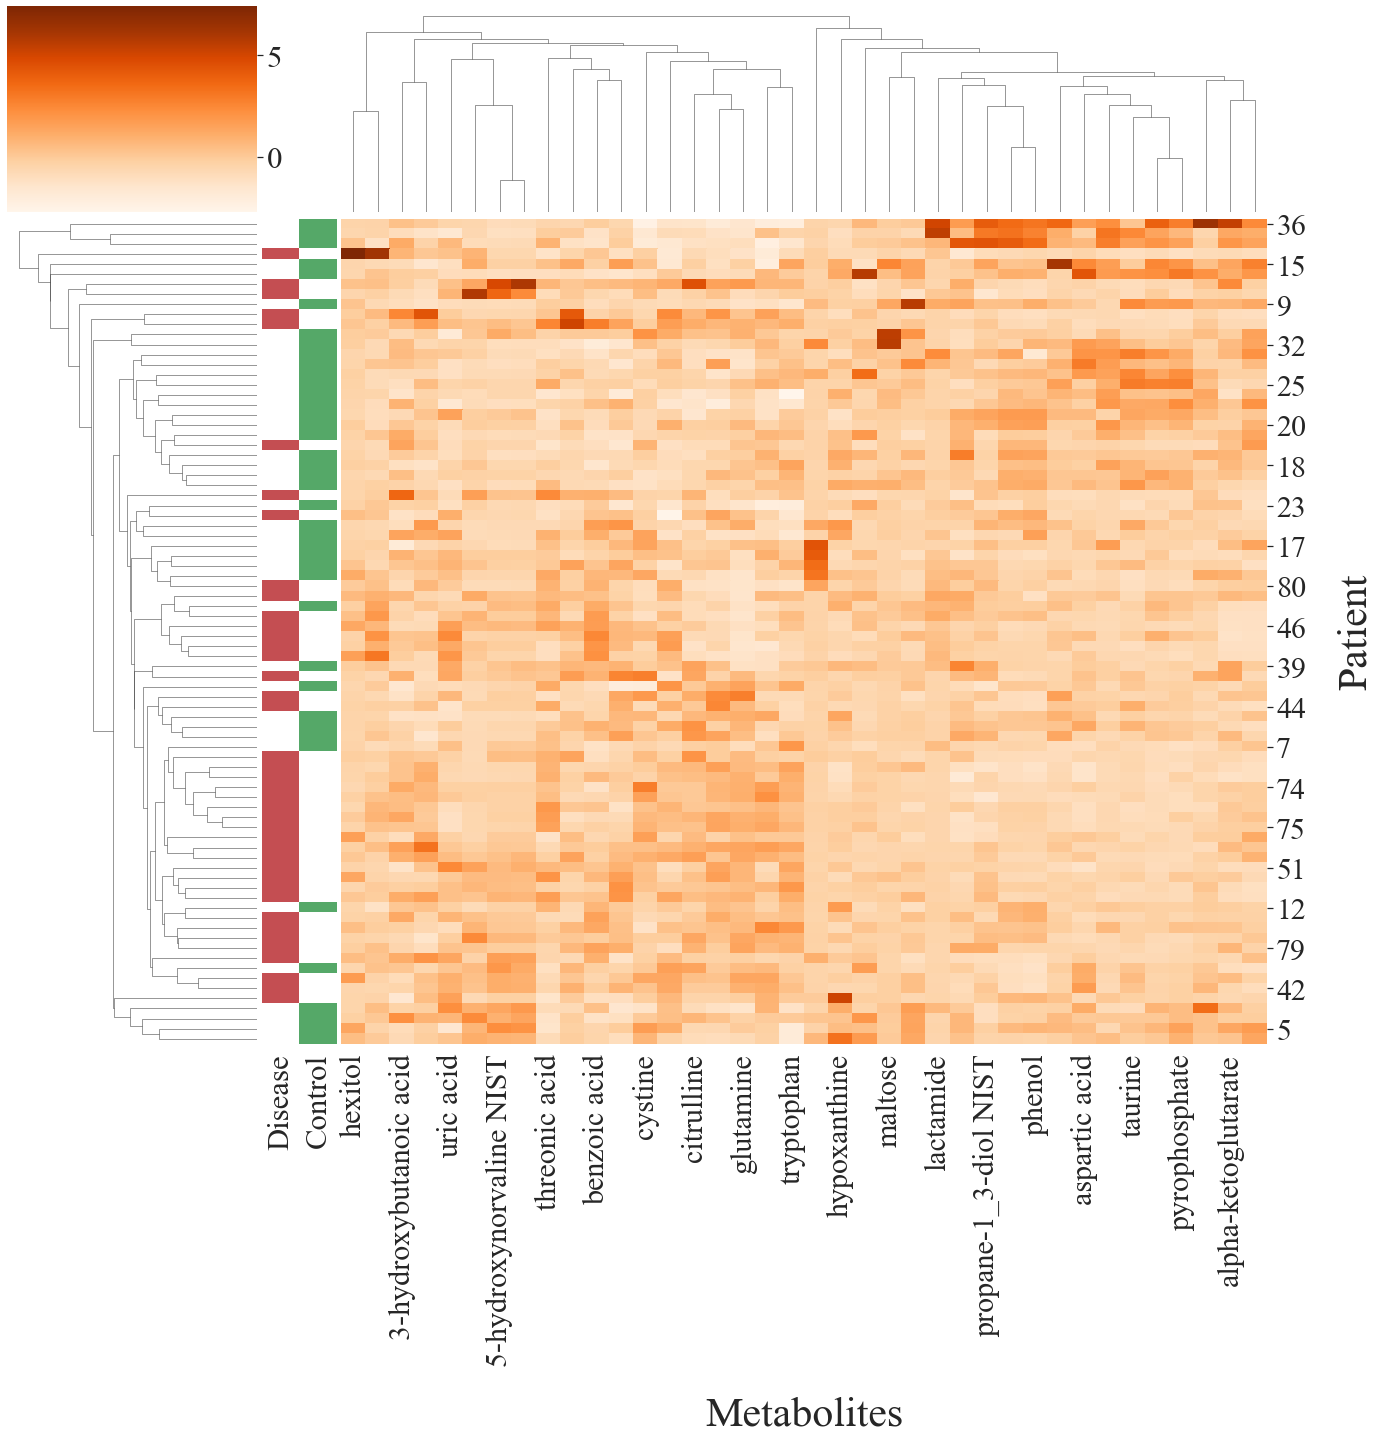

In [ ]:
X = plasma[pearson_p_final_plasma]
label = plasma["Class"]
y = label.map({"control": 1, "disease": 0})

clustermap(X, label, 21, 15, 15, 'cm_plasma_a2.jpg', 'Oranges')

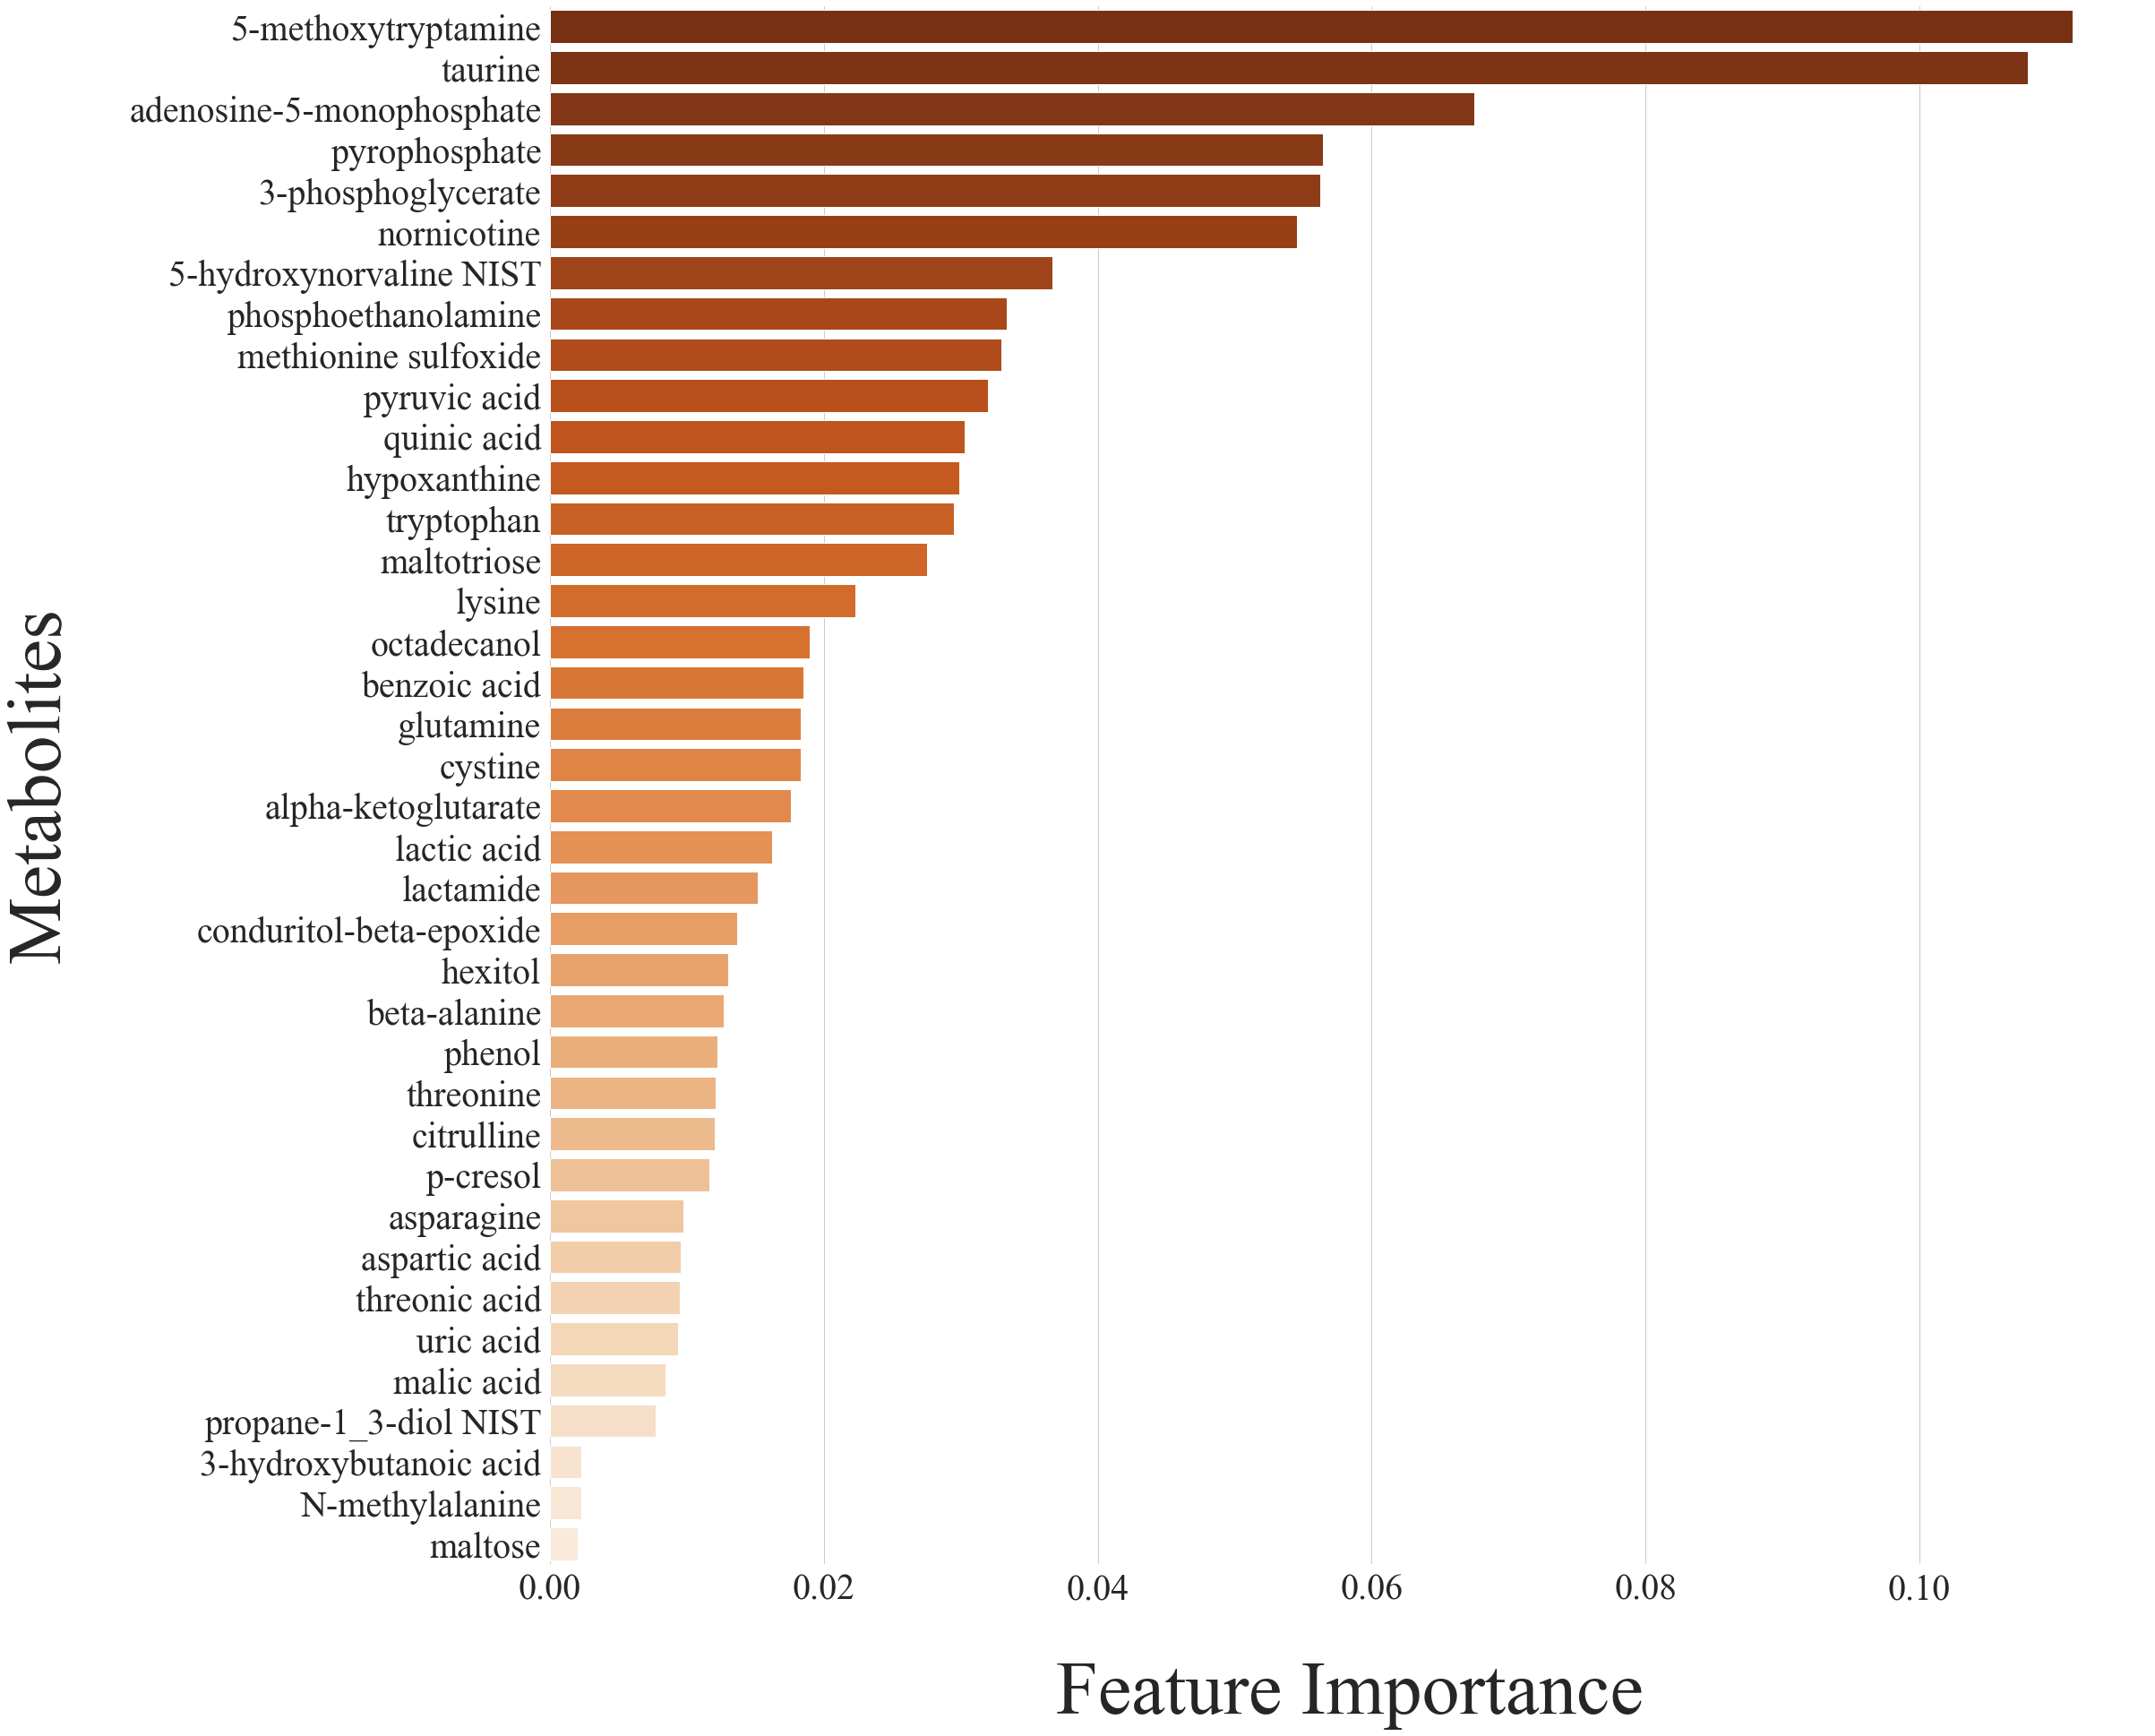

In [ ]:
feature_importance_plot(X, y, 21, 15, 10, 'fip_plasma_a2.jpg', 'Oranges')

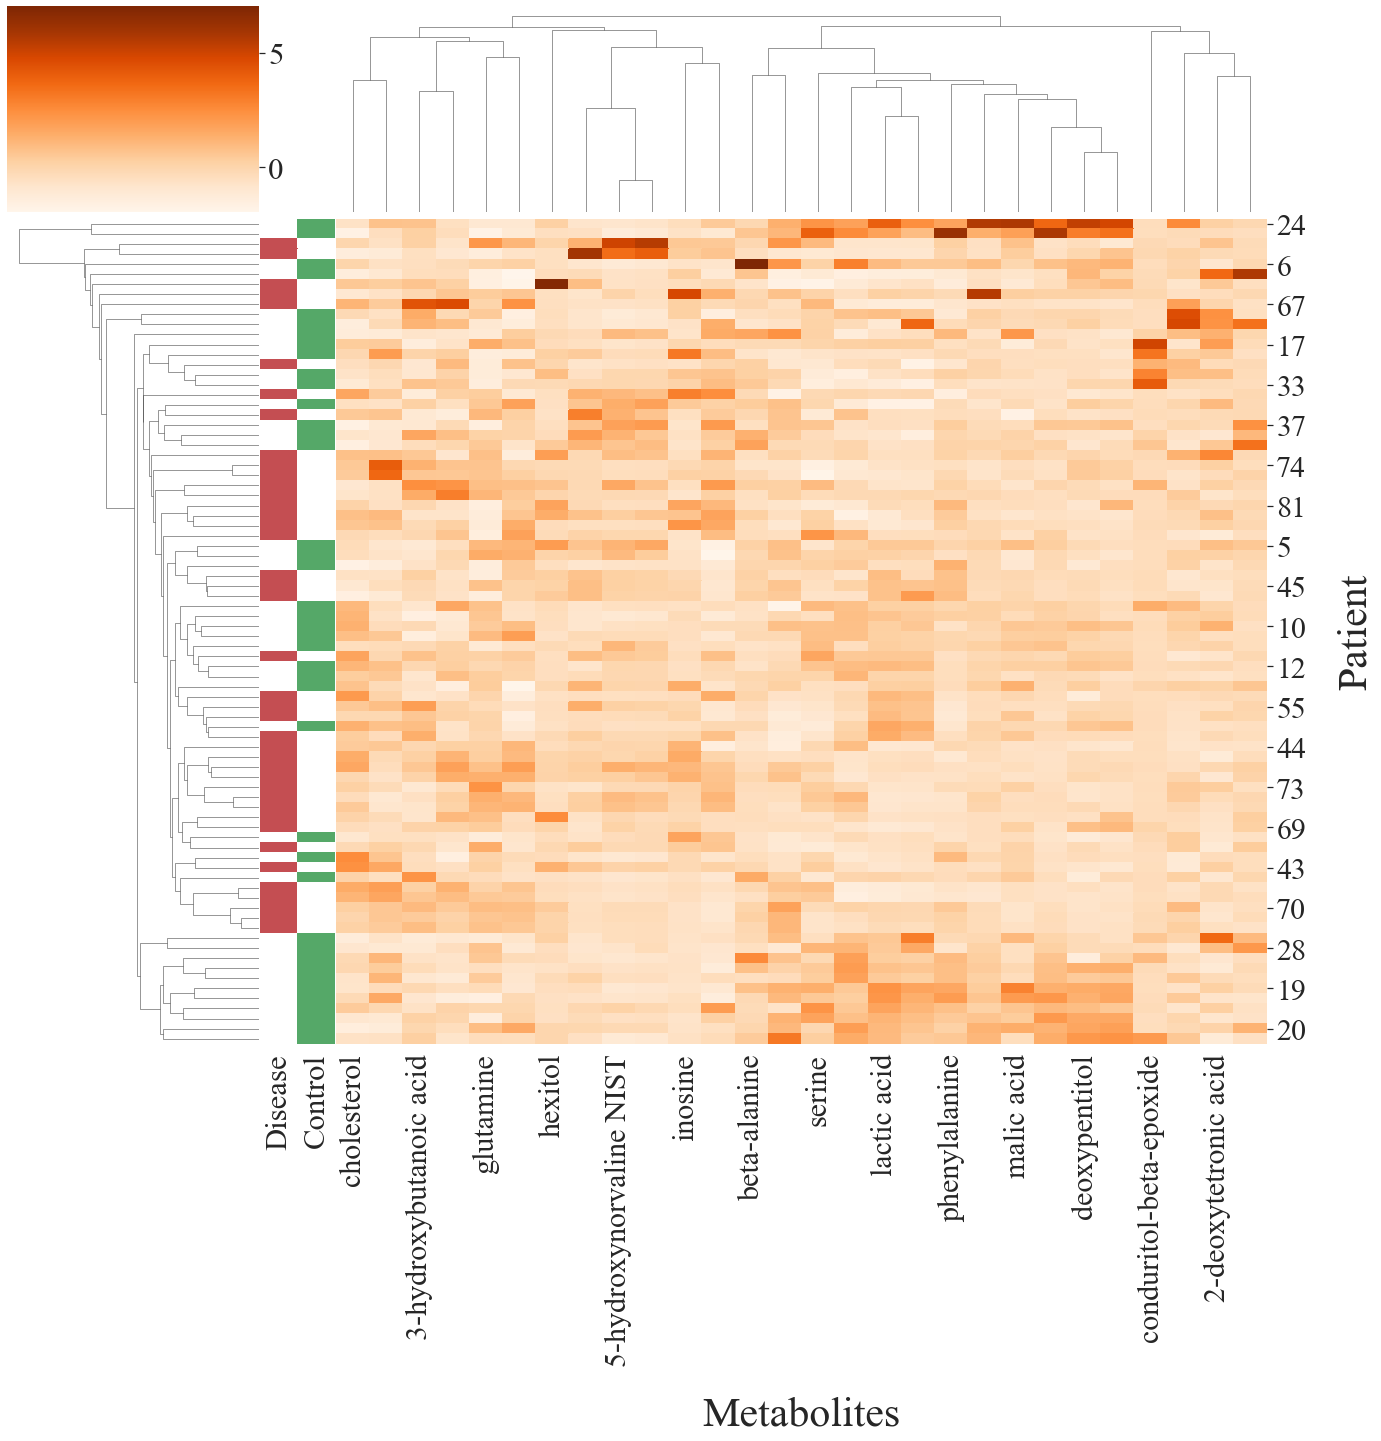

In [ ]:
X = serum[pearson_p_final_serum]

clustermap(X, label, 21, 15, 15, 'cm_serum_a2.jpg', 'Oranges')

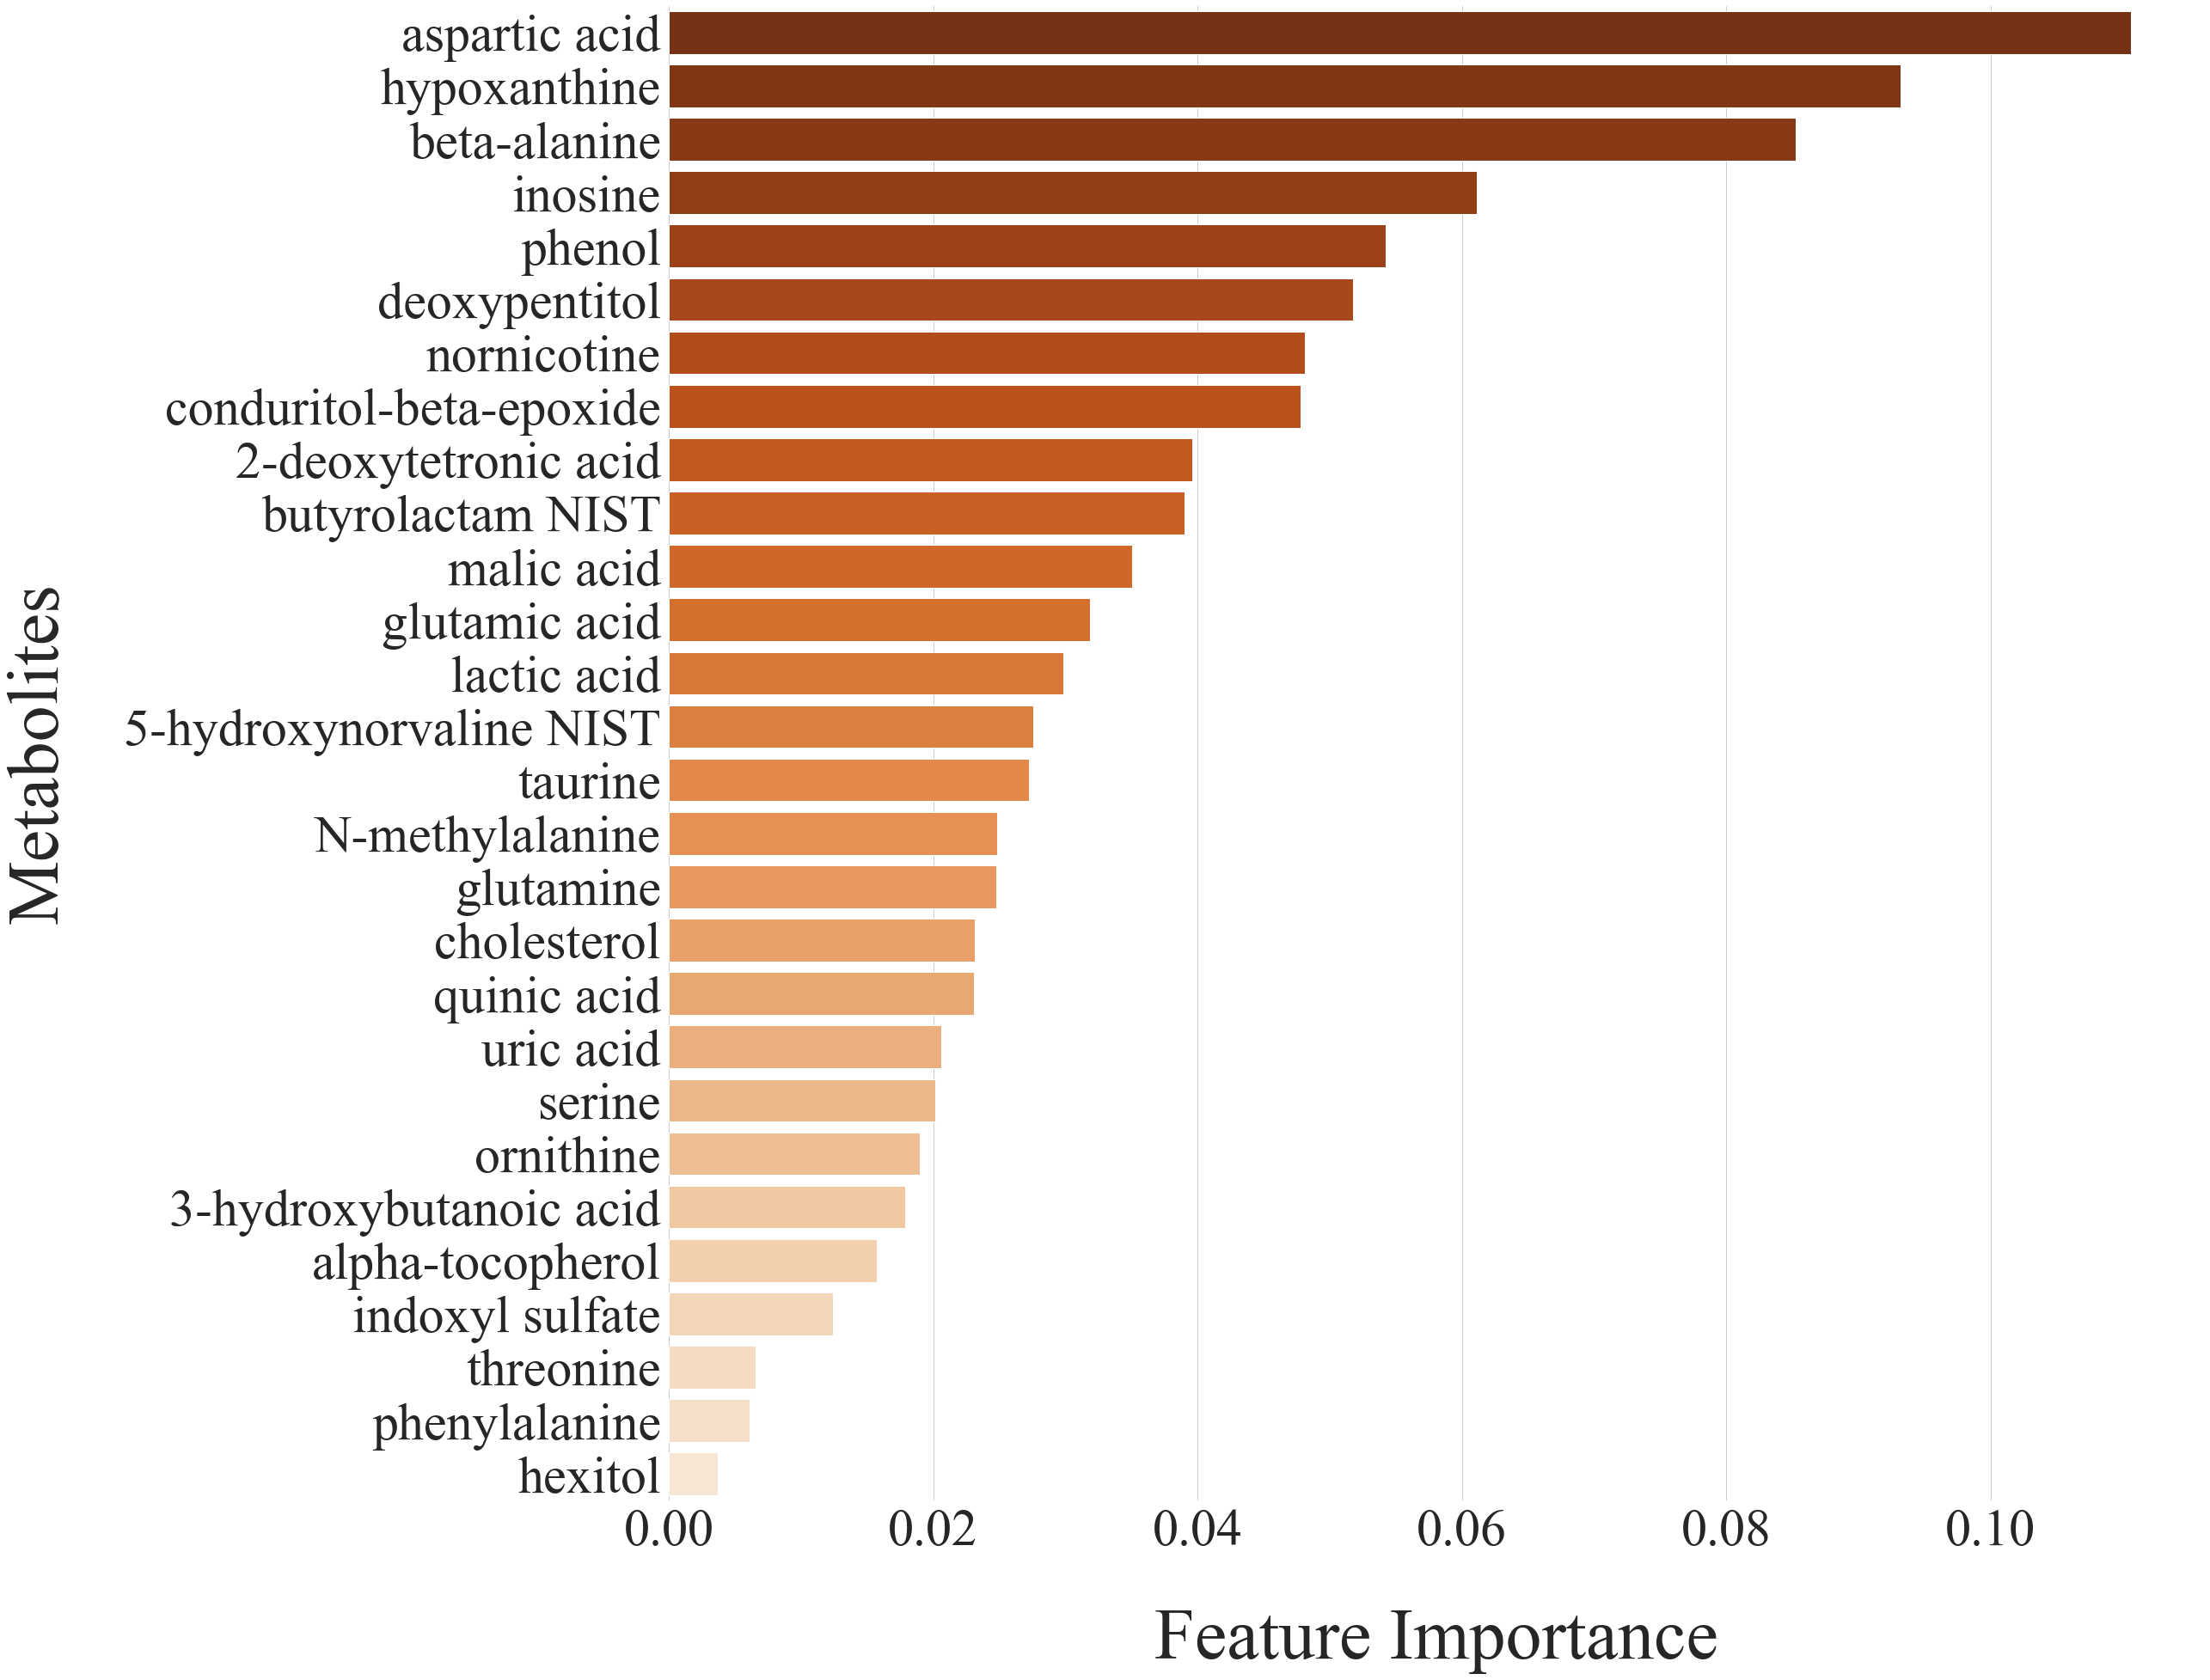

In [ ]:
feature_importance_plot(X, y, 21, 15, 15, 'fip_serum_a2.jpg', 'Oranges')

### `Performance Comparison`

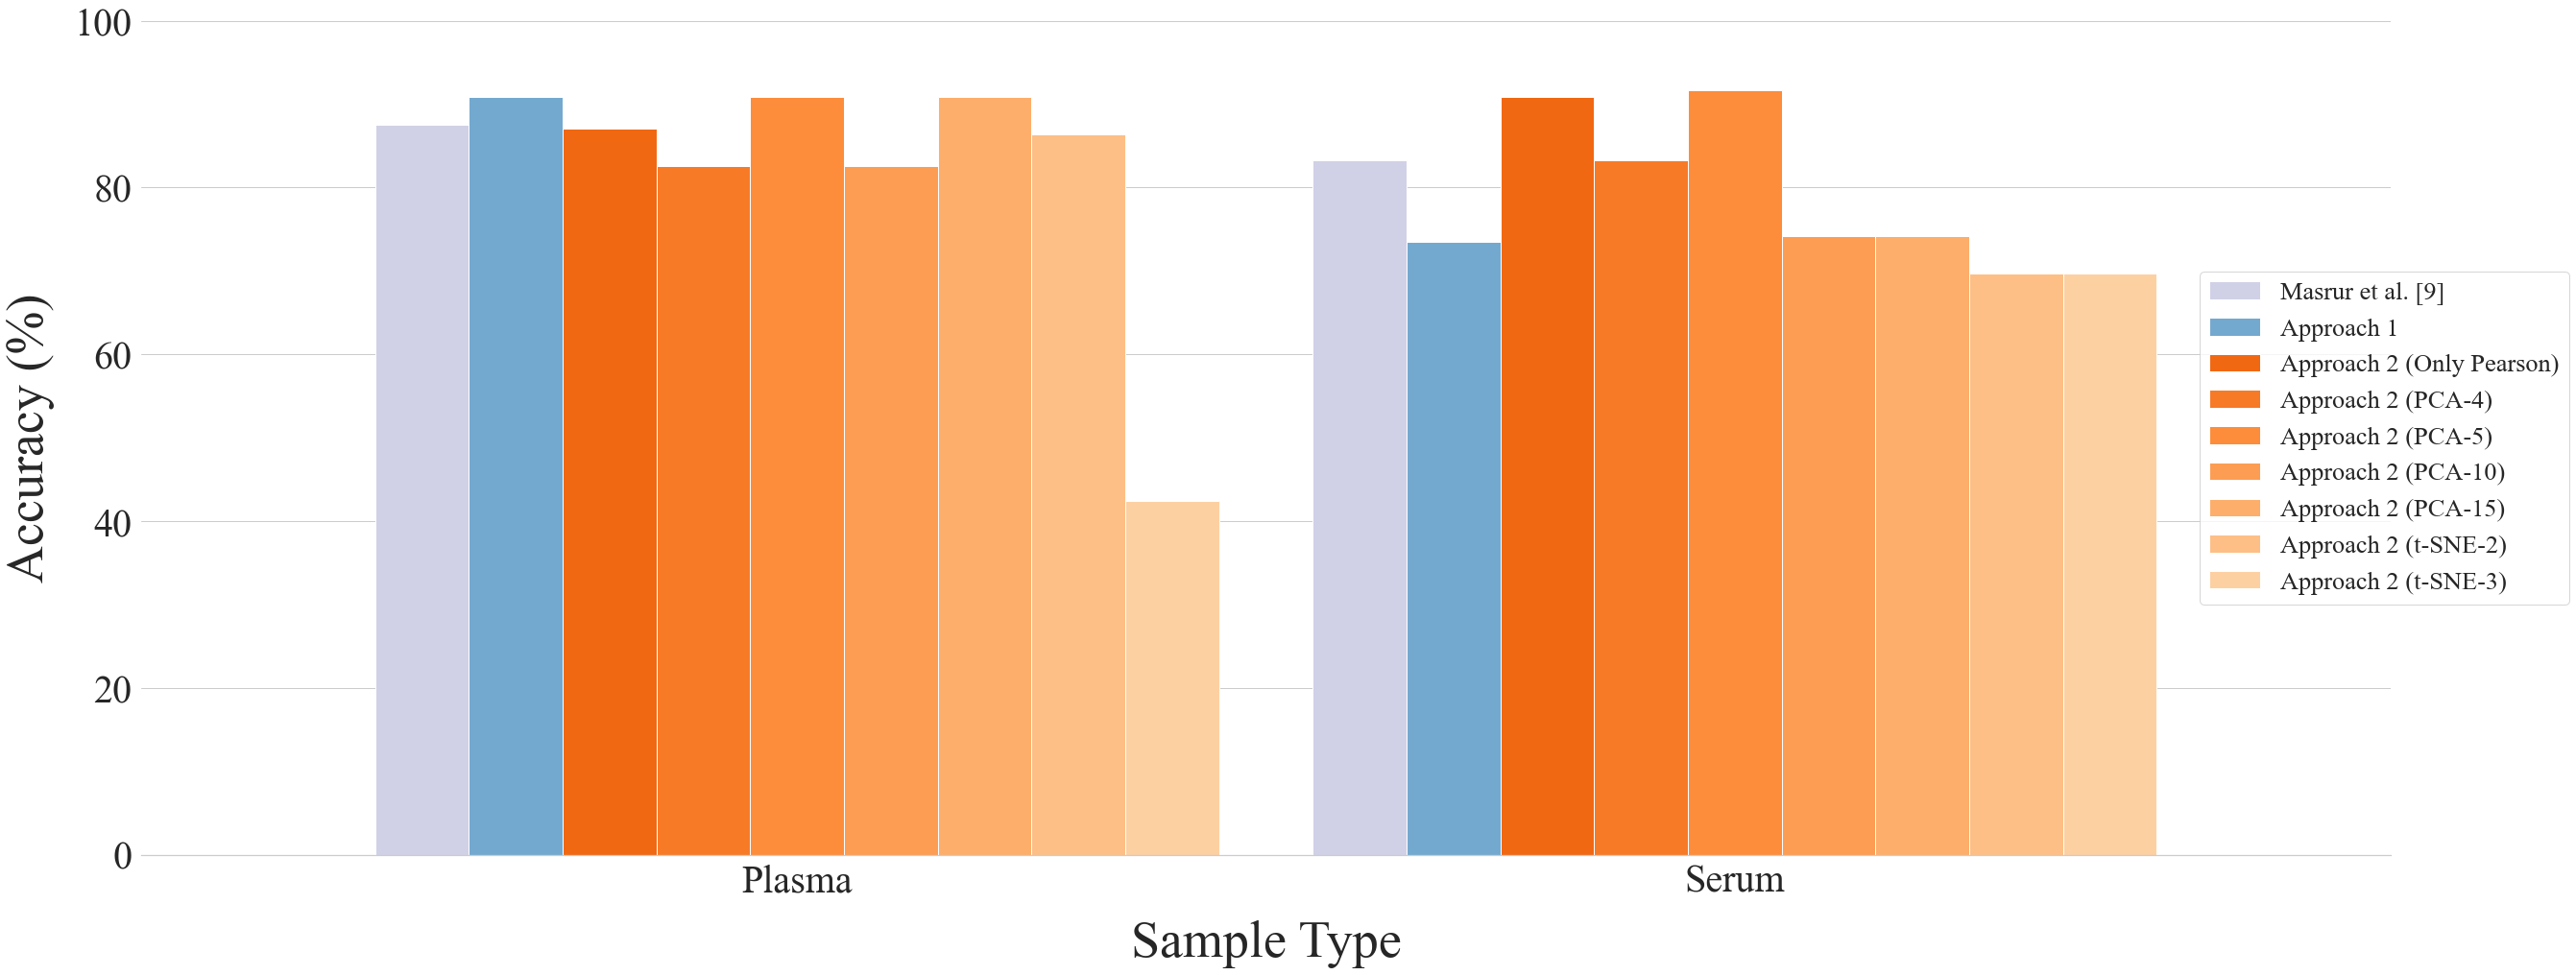

In [19]:
factor = 2
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.2*factor)
sns.set_style({'font.family': 'Times New Roman'})

both = [['Plasma', 87.50, 90.91, 87.12, 82.58, 90.91, 82.58, 90.91, 86.36, 42.42],
        ['Serum', 83.33, 73.48, 90.91, 83.33, 91.67, 74.24, 74.24, 69.70, 69.70]]

cols = ['Sample Type', 'Masrur et al. [9]', 'Approach 1', 'Approach 2 (Only Pearson)', 'Approach 2 (PCA-4)',
        'Approach 2 (PCA-5)', 'Approach 2 (PCA-10)', 'Approach 2 (PCA-15)', 'Approach 2 (t-SNE-2)', 'Approach 2 (t-SNE-3)']
both_df = pd.DataFrame(both, columns=cols)

both_df.plot(x='Sample Type', y=cols[1:], kind="bar",
             figsize=(21*factor, 8*factor), width=0.9, color=['#d0d1e6','#73a9cf', '#f16813', '#f77a27', '#fd8c3b', '#fd9d53', '#fdae6a', '#fdbf86', '#fdd0a2'], edgecolor='white')

plt.xlabel('Sample Type', size=27*factor,  labelpad=10*factor)
plt.xticks(rotation='horizontal', size=20*factor)
plt.yticks(size=20*factor)
plt.ylabel('Accuracy (%)', size=27*factor, labelpad=10*factor)
plt.legend(loc='center right', bbox_to_anchor=(1.085, 0.5))
plt.ylim([0, 100])
plt.grid(axis='x')
sns.despine(left=True)

plt.savefig('performance_comparison.jpg', bbox_inches='tight', pad_inches=0)
plt.show()